#**Importing Libararies and reading the data**

In [30]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier







# Read the dataset
df = pd.read_csv('abalone.data', header=None, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'])

# Dataset View
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Dataset Overview and Data Integrity Checks

In [4]:
# Shape of Data
df.shape

# Check for missing values
df.isnull().sum()

# Display the number of unique values in each column
unique_values_count = df.nunique()
print("Number of unique values in each column:")
print(unique_values_count)


Number of unique values in each column:
Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell_weight       926
Rings               28
dtype: int64


#**Data Cleaning and Transformation**

In [5]:

# Dropping unwanted columns and performing initial data cleaning and transformations.
df.drop('Sex', axis=1, inplace=True)
df.head()
df.shape
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Handling Numeric Conversion and Target Variable Setup

In [6]:
# Converting height column to numeric, setting up the target variable 'Rings'.
df = df[pd.to_numeric(df['Height'], errors='coerce').notnull()]
df['Height'] = df['Height'].astype('float')
target_column = 'Rings'

# Exploring Target Variable Distribution

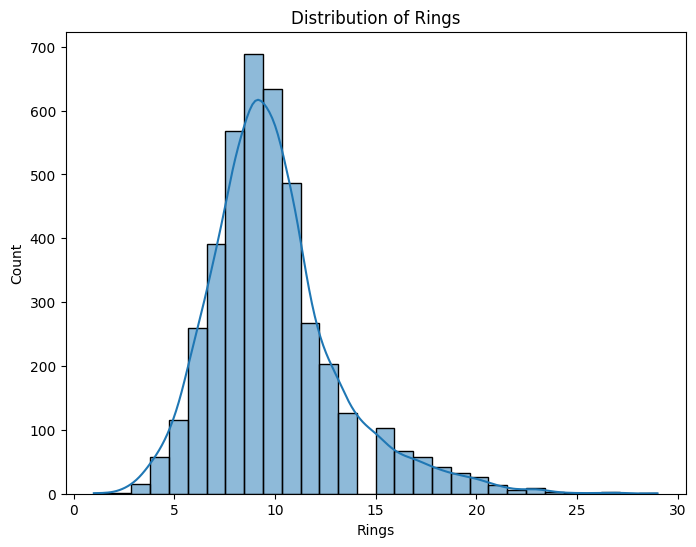

Summary Statistics of Rings:
count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64


In [7]:
# Visualizing the distribution of the target variable 'Rings' and displaying its summary statistics.
plt.figure(figsize=(8, 6))
sns.histplot(df[target_column], bins=30, kde=True)
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()
print("Summary Statistics of Rings:")
print(df[target_column].describe())

# Data Splitting for Training and Testing

In [8]:
# Splitting the dataset into training and testing sets for model development.
X = df.drop(target_column, axis=1)
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Data Resampling and Standardization**

In [9]:
# Oversampling the training set and standardizing the features using RandomOverSampler and StandardScaler.
oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Training with Random Forest Regressor**

In [10]:
# Training a Random Forest Regressor model using the preprocessed data.
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred = random_forest_regressor.predict(X_test)

# **Model Evaluation and Result Display**

In [11]:
# Evaluating the model performance using metrics like Mean Absolute Error, Mean Squared Error, and R-squared.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 1.7227
Mean Squared Error: 5.8718
R-squared: 0.4576


# Visualization of Predictions

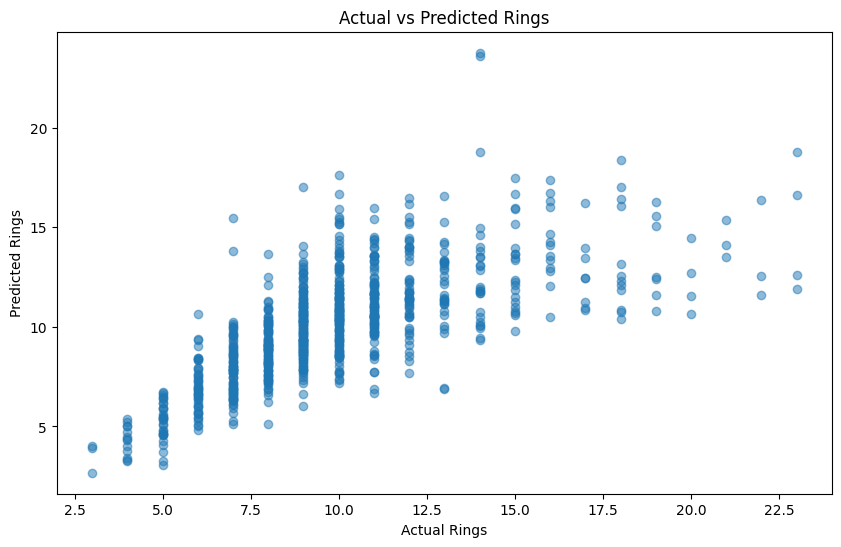

In [13]:
# Visualizing the predicted values against the actual values for model assessment.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Rings')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.show()

# **Calculating and Visualizing Correlation**

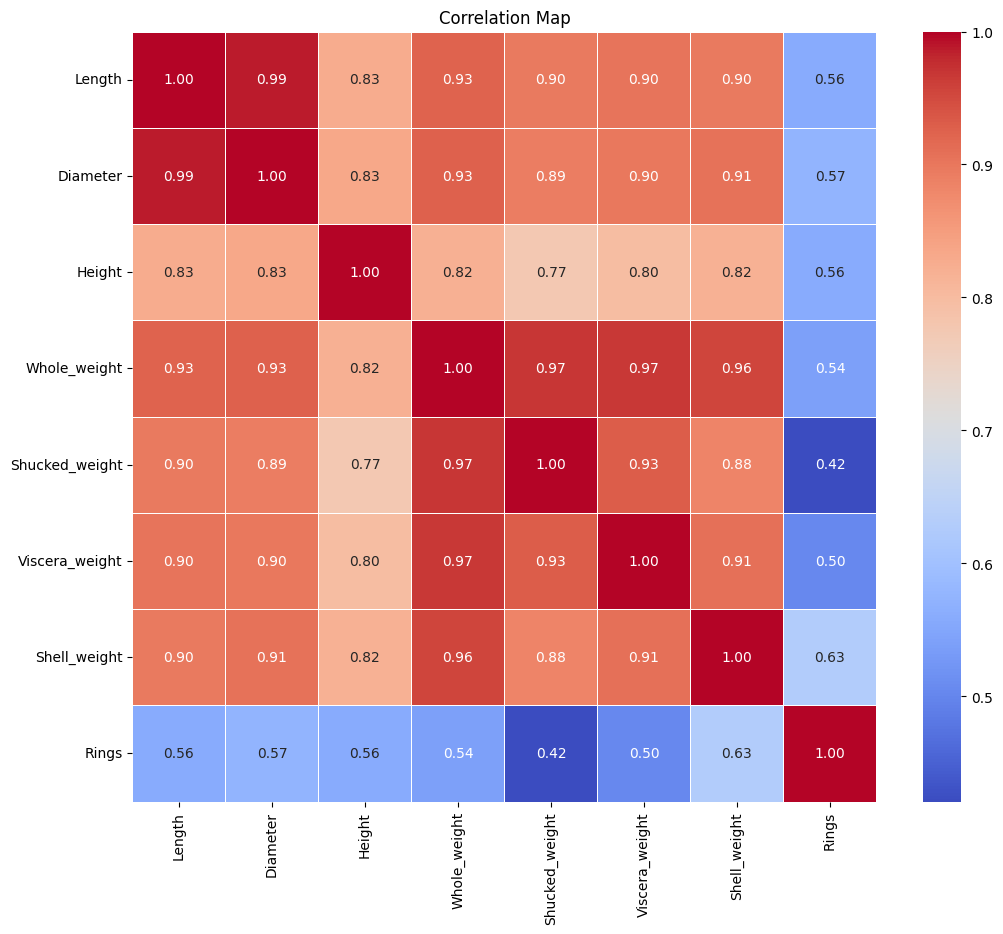

In [14]:
# Calculate the correlation matrix and plot the correlation heatmap.

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()

# **Model Training - Naive Bayes**

In [17]:
# Train a Naive Bayes classifier and make predictions.

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test)

# **Model Training - Decision Tree**

In [21]:
# Train a Decision Tree classifier and make predictions.

decision_tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)

# **Model Training - Random Forest**

In [24]:
# Train a Random Forest classifier and make predictions.

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)

# **Evaluate and Plot Results for Each Model**

Naive Bayes Accuracy: 0.1112

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           3       0.17      1.00      0.29         3
           4       0.22      0.38      0.28        13
           5       0.16      0.28      0.20        32
           6       0.15      0.23      0.18        48
           7       0.23      0.26      0.25        84
           8       0.32      0.21      0.25        99
           9       0.31      0.09      0.14       142
          10       0.00      0.00      0.00       139
          11       0.35      0.06      0.11        93
          12       0.25      0.02      0.04        51
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        26
          15       0.06      0.05      0.05        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

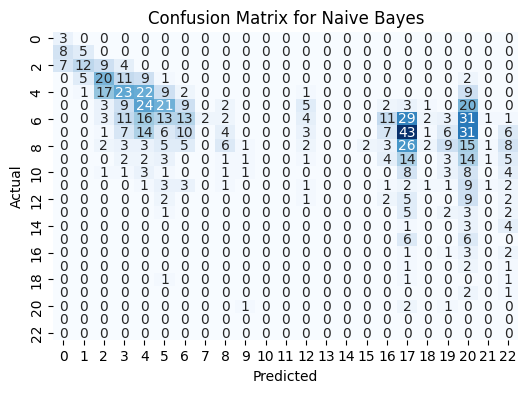

Decision Tree Accuracy: 0.0347

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           3       0.13      1.00      0.23         3
           4       0.00      0.00      0.00        13
           5       0.15      0.69      0.25        32
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        84
           8       0.00      0.00      0.00        99
           9       0.00      0.00      0.00       142
          10       0.00      0.00      0.00       139
          11       0.00      0.00      0.00        93
          12       0.25      0.02      0.04        51
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

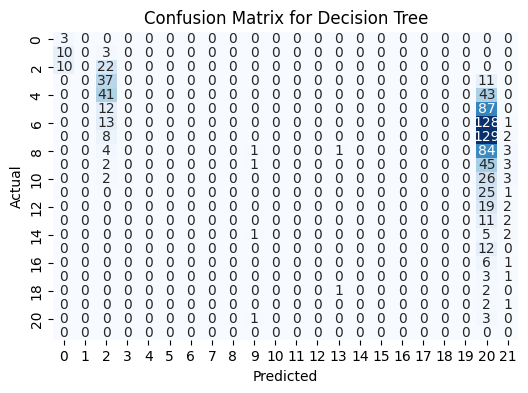

Random Forest Accuracy: 0.2488

Classification Report for Random Forest:
              precision    recall  f1-score   support

           3       0.14      0.33      0.20         3
           4       0.25      0.23      0.24        13
           5       0.39      0.44      0.41        32
           6       0.24      0.31      0.27        48
           7       0.31      0.26      0.29        84
           8       0.31      0.40      0.35        99
           9       0.30      0.28      0.29       142
          10       0.21      0.18      0.20       139
          11       0.29      0.32      0.30        93
          12       0.17      0.14      0.15        51
          13       0.09      0.13      0.10        31
          14       0.06      0.04      0.05        26
          15       0.09      0.10      0.09        21
          16       0.14      0.15      0.15        13
          17       0.17      0.12      0.14         8
          18       0.00      0.00      0.00        12
        

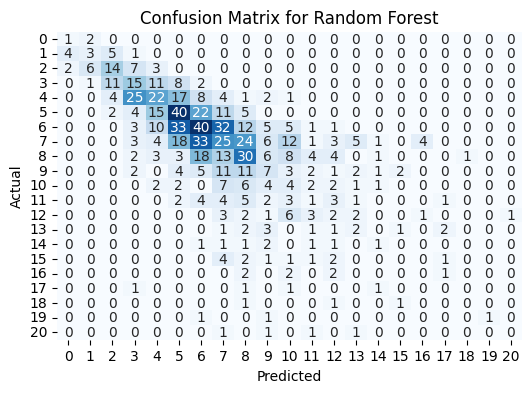

In [31]:
# Evaluate the models using accuracy, classification report, and confusion matrix.

models = ['Naive Bayes', 'Decision Tree', 'Random Forest']
predictions = [naive_bayes_predictions, decision_tree_predictions, random_forest_predictions]

for model, pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, pred)
    print(f"{model} Accuracy: {accuracy:.4f}")

    # Classification Report
    print(f"\nClassification Report for {model}:")
    print(classification_report(y_test, pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {model}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# **Compare Model Accuracies**

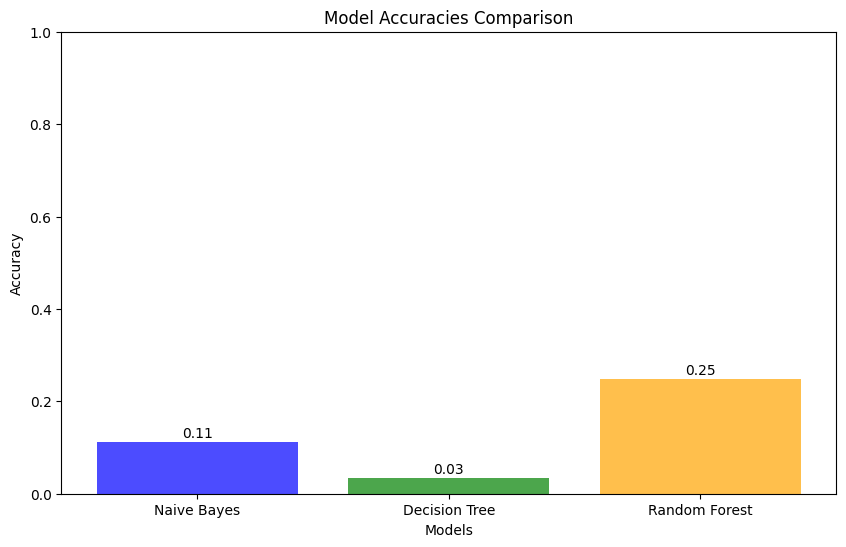

In [32]:
# Calculate accuracies and plot a bar chart comparing the performance of different models.

naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

models = ['Naive Bayes', 'Decision Tree', 'Random Forest']
accuracies = [naive_bayes_accuracy, decision_tree_accuracy, random_forest_accuracy]

plt.figure(figsize=(10, 6))
bar_plot = plt.bar(models, accuracies, color=['blue', 'green', 'orange'], alpha=0.7)

# Add data points
for i, model in enumerate(models):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')

plt.ylim(0, 1)
plt.title('Model Accuracies Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()